<a href="https://colab.research.google.com/github/justprophet/Synthetic-Image-Creation-and-Text-Detection/blob/master/ClassificationOfScales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importing Libraries

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
!pip install -q keras

In [0]:
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/Practicum/Practicum/Data/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


#2. Extracting Data

In [0]:
!ls
#!mv Categories train
%cd Categories_Data

Categories


In [0]:
!mv Categories train
!find train/digital -size  0 -print0 |xargs -0 rm --
!find train/analog -size  0 -print0 |xargs -0 rm --

rm: missing operand
Try 'rm --help' for more information.
rm: missing operand
Try 'rm --help' for more information.


In [0]:
#!rm kagglecatsanddogs_3367a.zip.1
#!rm 'MSR-LA - 3467.docx'
!rm Categories_Data.zip
#!rm  Categories_Data.zip.1
#!rm -r test
#!rm -r train
#!rm filename.model
#% cd test
#% cd


#3. Storing Data and Doing Test-Train Split

In [0]:
from glob import glob
from sklearn.model_selection import train_test_split

analog = glob('train/analog/*.jpg')
digital = glob('train/digital/*.jpg')

analog_train, analog_test = train_test_split(analog, test_size=0.30)
digital_train, digital_test = train_test_split(digital, test_size=0.30)

TRAIN_DIR = 'train'
TEST_DIR = 'test'

!mkdir test

!mkdir test/analog
files = ' '.join(analog_test)
!mv -t test/analog $files

!mkdir test/digital
files = ' '.join(digital_test)
!mv -t test/digital $files

#4. Viewing a Sample Data with Their Indexes

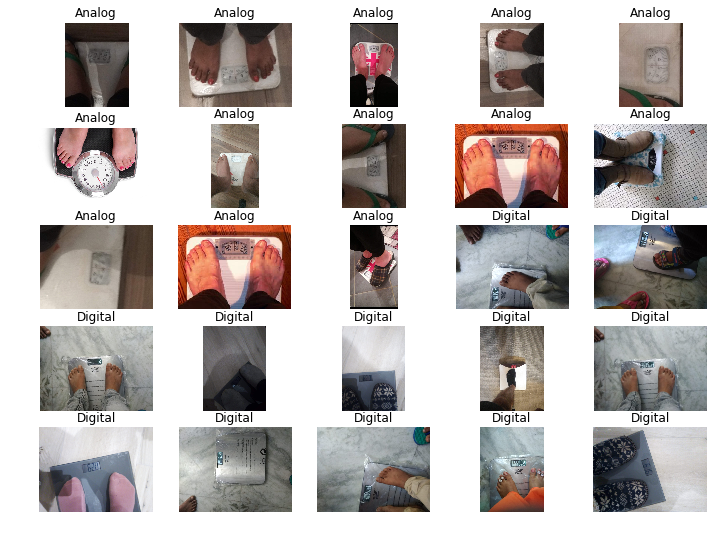

In [0]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

analog = np.random.choice(analog_train, 13)
digital = np.random.choice(digital_train, 12)
data = np.concatenate((analog, digital))
labels = 13 * ['Analog'] + 12 *['Digital']

N, R, C = 25, 5, 5
plt.figure(figsize=(12, 9))
for k, (src, label) in enumerate(zip(data, labels)):
    im = Image.open(src).convert('RGB')
    plt.subplot(R, C, k+1)
    plt.title(label)
    plt.imshow(np.asarray(im))
    plt.axis('off')

#5. Creating A Model

Model 1:Imagenet

In [0]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input

CLASSES = 2
    
# setup model
base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
   
# transfer learning
for layer in base_model.layers:
    layer.trainable = False
      
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Using TensorFlow backend.
W0810 12:28:30.725154 139840891541376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 12:28:30.730453 139840891541376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 12:28:30.743617 139840891541376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0810 12:28:30.777007 139840891541376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0810 

87916544/87910968 [==============================] - 1s 0us/step


W0810 12:28:45.626131 139840891541376 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0810 12:28:45.674638 139840891541376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Model 2: ResNet

In [0]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.resnet50 import ResNet50, preprocess_input

CLASSES = 2
    
# setup model
base_model = ResNet50(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model2 = Model(inputs=base_model.input, outputs=predictions)
   
# transfer learning
for layer in base_model.layers:
    layer.trainable = False
      
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


#6. Augmenting DataSet 

In [0]:
from keras.preprocessing.image import ImageDataGenerator

WIDTH = 299
HEIGHT = 299
BATCH_SIZE = 32

# data prep
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='categorical')
    
validation_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 349 images belonging to 2 classes.
Found 97 images belonging to 2 classes.


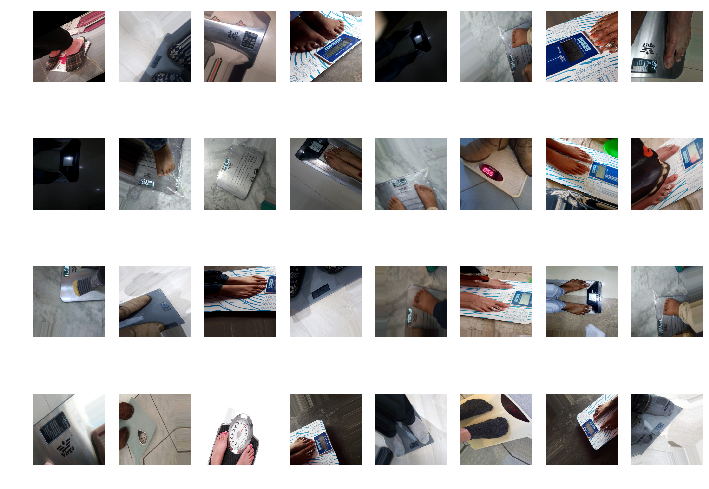

In [0]:
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(12, 9))
for k, (img, lbl) in enumerate(zip(x_batch, y_batch)):
    plt.subplot(4, 8, k+1)
    plt.imshow((img + 1) / 2)
    plt.axis('off')

#7. Running the Model

Model 1

In [0]:
EPOCHS = 5
BATCH_SIZE = 32
STEPS_PER_EPOCH = 320
VALIDATION_STEPS = 64

MODEL_FILE = 'filename.model'

history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS)
  
model.save(MODEL_FILE)

W0810 12:29:28.229170 139840891541376 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
320/320 [==============================] - 752s 2s/step - loss: 0.2057 - acc: 0.9215 - val_loss: 0.2885 - val_acc: 0.9046
Epoch 2/5
320/320 [==============================] - 644s 2s/step - loss: 0.0888 - acc: 0.9696 - val_loss: 0.2006 - val_acc: 0.9233
Epoch 3/5
320/320 [==============================] - 634s 2s/step - loss: 0.0659 - acc: 0.9764 - val_loss: 0.2210 - val_acc: 0.9285
Epoch 4/5
320/320 [==============================] - 637s 2s/step - loss: 0.0607 - acc: 0.9790 - val_loss: 0.1992 - val_acc: 0.9414
Epoch 5/5
320/320 [==============================] - 644s 2s/step - loss: 0.0588 - acc: 0.9785 - val_loss: 0.1681 - val_acc: 0.9394


Model 2

In [0]:
EPOCHS = 5
BATCH_SIZE = 32
STEPS_PER_EPOCH = 320
VALIDATION_STEPS = 64

MODEL_FILE = 'filename.model'

history = model2.fit_generator(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS)
  
model2.save(MODEL_FILE)

Epoch 1/5
320/320 [==============================] - 669s 2s/step - loss: 0.0914 - acc: 0.9693 - val_loss: 0.5391 - val_acc: 0.8479
Epoch 2/5
320/320 [==============================] - 644s 2s/step - loss: 0.0183 - acc: 0.9948 - val_loss: 0.9816 - val_acc: 0.8434
Epoch 3/5
320/320 [==============================] - 642s 2s/step - loss: 0.0096 - acc: 0.9972 - val_loss: 0.9215 - val_acc: 0.8454
Epoch 4/5
320/320 [==============================] - 645s 2s/step - loss: 0.0078 - acc: 0.9978 - val_loss: 1.0250 - val_acc: 0.8460
Epoch 5/5
320/320 [==============================] - 649s 2s/step - loss: 0.0063 - acc: 0.9982 - val_loss: 1.1878 - val_acc: 0.8460


#8. Plotting Training and Validation Loss

Model 1

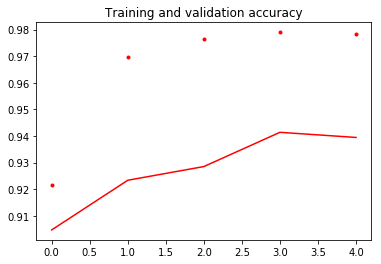

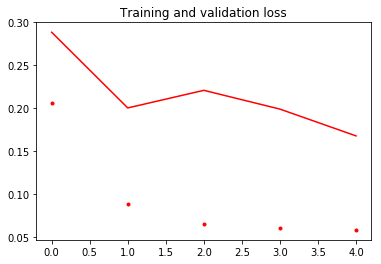

In [0]:
def plot_training(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'r.')
  plt.plot(epochs, val_acc, 'r')
  plt.title('Training and validation accuracy')
  
  plt.figure()
  plt.plot(epochs, loss, 'r.')
  plt.plot(epochs, val_loss, 'r-')
  plt.title('Training and validation loss')
  plt.show()
  
plot_training(history)

Model 2

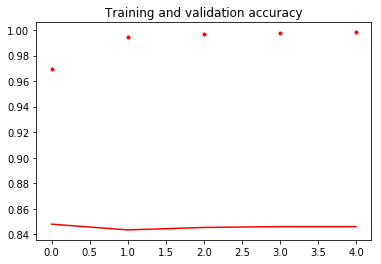

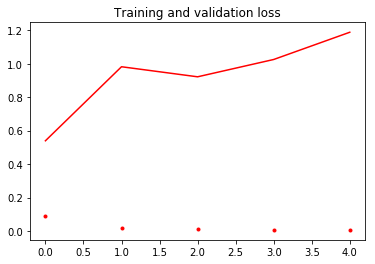

In [0]:
def plot_training(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'r.')
  plt.plot(epochs, val_acc, 'r')
  plt.title('Training and validation accuracy')
  
  plt.figure()
  plt.plot(epochs, loss, 'r.')
  plt.plot(epochs, val_loss, 'r-')
  plt.title('Training and validation loss')
  plt.show()
  
plot_training(history)

Model 1

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from keras.preprocessing import image
from keras.models import load_model


def predict(model, img):
    """Run model prediction on image
    Args:
        model: keras model
        img: PIL format image
    Returns:
        list of predicted labels and their probabilities 
    """
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return preds[0]


def plot_preds(img, preds):
    """Displays image and the top-n predicted probabilities in a bar graph
    Args:
        preds: list of predicted labels and their probabilities
    """
    labels = ("analog", "digital")
    gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])
    plt.figure(figsize=(8,8))
    plt.subplot(gs[0])
    plt.imshow(np.asarray(img))
    plt.subplot(gs[1])
    plt.barh([0, 1], preds, alpha=0.5)
    plt.yticks([0, 1], labels)
    plt.xlabel('Probability')
    plt.xlim(0, 1)
    plt.tight_layout()

Model 2

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from keras.preprocessing import image
from keras.models import load_model


def predict(model2, img):
    """Run model prediction on image
    Args:
        model: keras model
        img: PIL format image
    Returns:
        list of predicted labels and their probabilities 
    """
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model2.predict(x)
    return preds[0]


def plot_preds(img, preds):
    """Displays image and the top-n predicted probabilities in a bar graph
    Args:
        preds: list of predicted labels and their probabilities
    """
    labels = ("analog", "digital")
    gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])
    plt.figure(figsize=(8,8))
    plt.subplot(gs[0])
    plt.imshow(np.asarray(img))
    plt.subplot(gs[1])
    plt.barh([0, 1], preds, alpha=0.5)
    plt.yticks([0, 1], labels)
    plt.xlabel('Probability')
    plt.xlim(0, 1)
    plt.tight_layout()

#Generating Predictions

Model 1

In [0]:
model = load_model(MODEL_FILE)

array([1., 0.], dtype=float32)

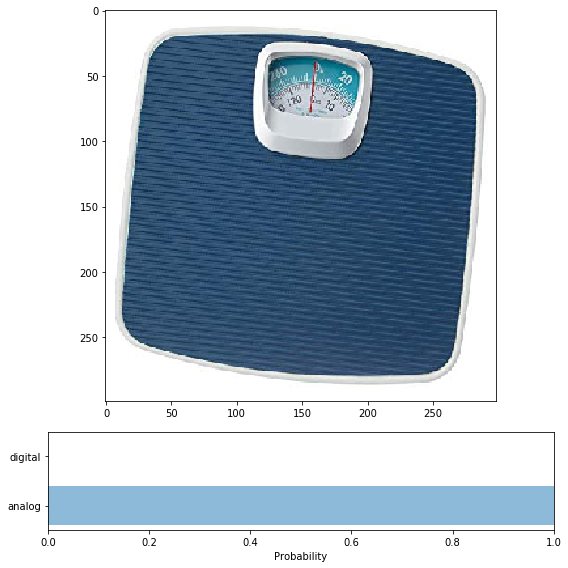

In [0]:
img = image.load_img('test/analog/502.jpg', target_size=(HEIGHT, WIDTH))
preds = predict(model, img)

plot_preds(np.asarray(img), preds)
preds

Model 2

In [0]:
model2 = load_model(MODEL_FILE)

array([3.63708e-12, 1.00000e+00], dtype=float32)

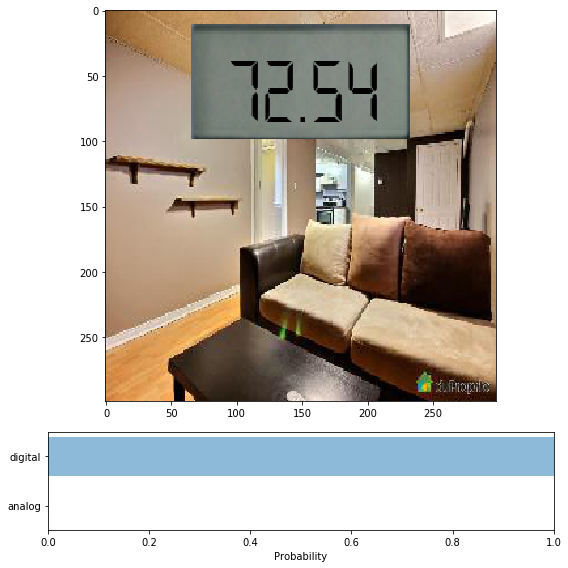

In [0]:
img = image.load_img('test/digital/synImage1.png', target_size=(HEIGHT, WIDTH))
preds = predict(model2, img)

plot_preds(np.asarray(img), preds)
preds